In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
import pandas as pd

file_paths = [
    ('/home/aibig30/PCI-AS/demo/outputs/240703_003_C2_output.txt', '/home/aibig30/PCI-AS/demo/outputs/240703_003_C7_output.txt'),
    ('/home/aibig30/PCI-AS/demo/outputs/240705_007_C2_output.txt', '/home/aibig30/PCI-AS/demo/outputs/240705_007_C7_output.txt'),
    ('/home/aibig30/PCI-AS/demo/outputs/240705_008_C2_output.txt', '/home/aibig30/PCI-AS/demo/outputs/240705_008_C7_output.txt'),
    ('/home/aibig30/PCI-AS/demo/outputs/240712_007_C2_output.txt', '/home/aibig30/PCI-AS/demo/outputs/240712_007_C7_output.txt'),
    ('/home/aibig30/PCI-AS/demo/outputs/240713_011_C2_output.txt', '/home/aibig30/PCI-AS/demo/outputs/240713_011_C7_output.txt'),
    ('/home/aibig30/PCI-AS/demo/outputs/240713_012_C2_output.txt', '/home/aibig30/PCI-AS/demo/outputs/240713_012_C7_output.txt')
]

merged_data = []

for c2_file, c7_file in file_paths:
    df_c2 = pd.read_csv(c2_file, sep=',')
    df_c7 = pd.read_csv(c7_file, sep=',')

    merged_df = pd.merge(df_c2, df_c7, on='frame')

    file_name = c2_file.split('/')[-1].split('_C2_output.txt')[0]
    merged_df['filename'] = file_name

    merged_df = merged_df[['filename'] + [col for col in merged_df.columns if col != 'filename']]
    merged_data.append(merged_df)

final_df = pd.concat(merged_data, axis=0, ignore_index=True)

print(final_df)

final_df.to_csv('/home/aibig30/PCI-AS/demo/outputs/merged_output.txt', sep=',', index=False)

In [ ]:
df = pd.read_csv('/home/aibig30/PCI-AS/demo/outputs/merged_output.txt', sep=',')

df.rename(columns={
    'distance': 'PCD',
    'adult_speed': 'PS',
    'child_speed': 'CS',
    'adult_angle': 'PG',
    'child_angle': 'CG'
}, inplace=True)

df.dropna(inplace=True)

df.to_csv('/home/aibig30/PCI-AS/demo/outputs/cleaned_merged_output.csv', sep=',', index=False)

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/home/aibig30/PCI-AS/demo/outputs/cleaned_merged_output.csv', sep=',')

features = df[['PCD', 'PS', 'CS', 'PG', 'CG']]

features = features.apply(pd.to_numeric, errors='coerce')

features.dropna(inplace=True)

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

normalized_df = pd.DataFrame(normalized_features, columns=features.columns, index=features.index)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['PCD', 'PS', 'CS', 'PG', 'CG']
colors = sns.color_palette("viridis", len(variables))

for i, variable in enumerate(variables):
    plt.figure(figsize=(8, 6), dpi=300)
    sns.histplot(normalized_df[variable], bins=30, kde=True, color=colors[i])
    
    plt.title(f'Histogram of {variable}', fontsize=18)
    plt.xlabel(variable, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.savefig(f'/home/aibig30/PCI-AS/demo/outputs/histogram_{variable}.png')
    plt.close() 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = normalized_df.corr()

plt.figure(figsize=(15, 12), dpi=300)
sns.heatmap(correlation_matrix, annot=True, cmap='Greys', annot_kws={"size": 18})

plt.title('Correlation Matrix', fontsize=20)

plt.xticks(fontsize=16, rotation=45, ha="right")
plt.yticks(fontsize=16, rotation=0)

plt.savefig('/home/aibig30/PCI-AS/demo/outputs/correlation_matrix.png')
plt.close()

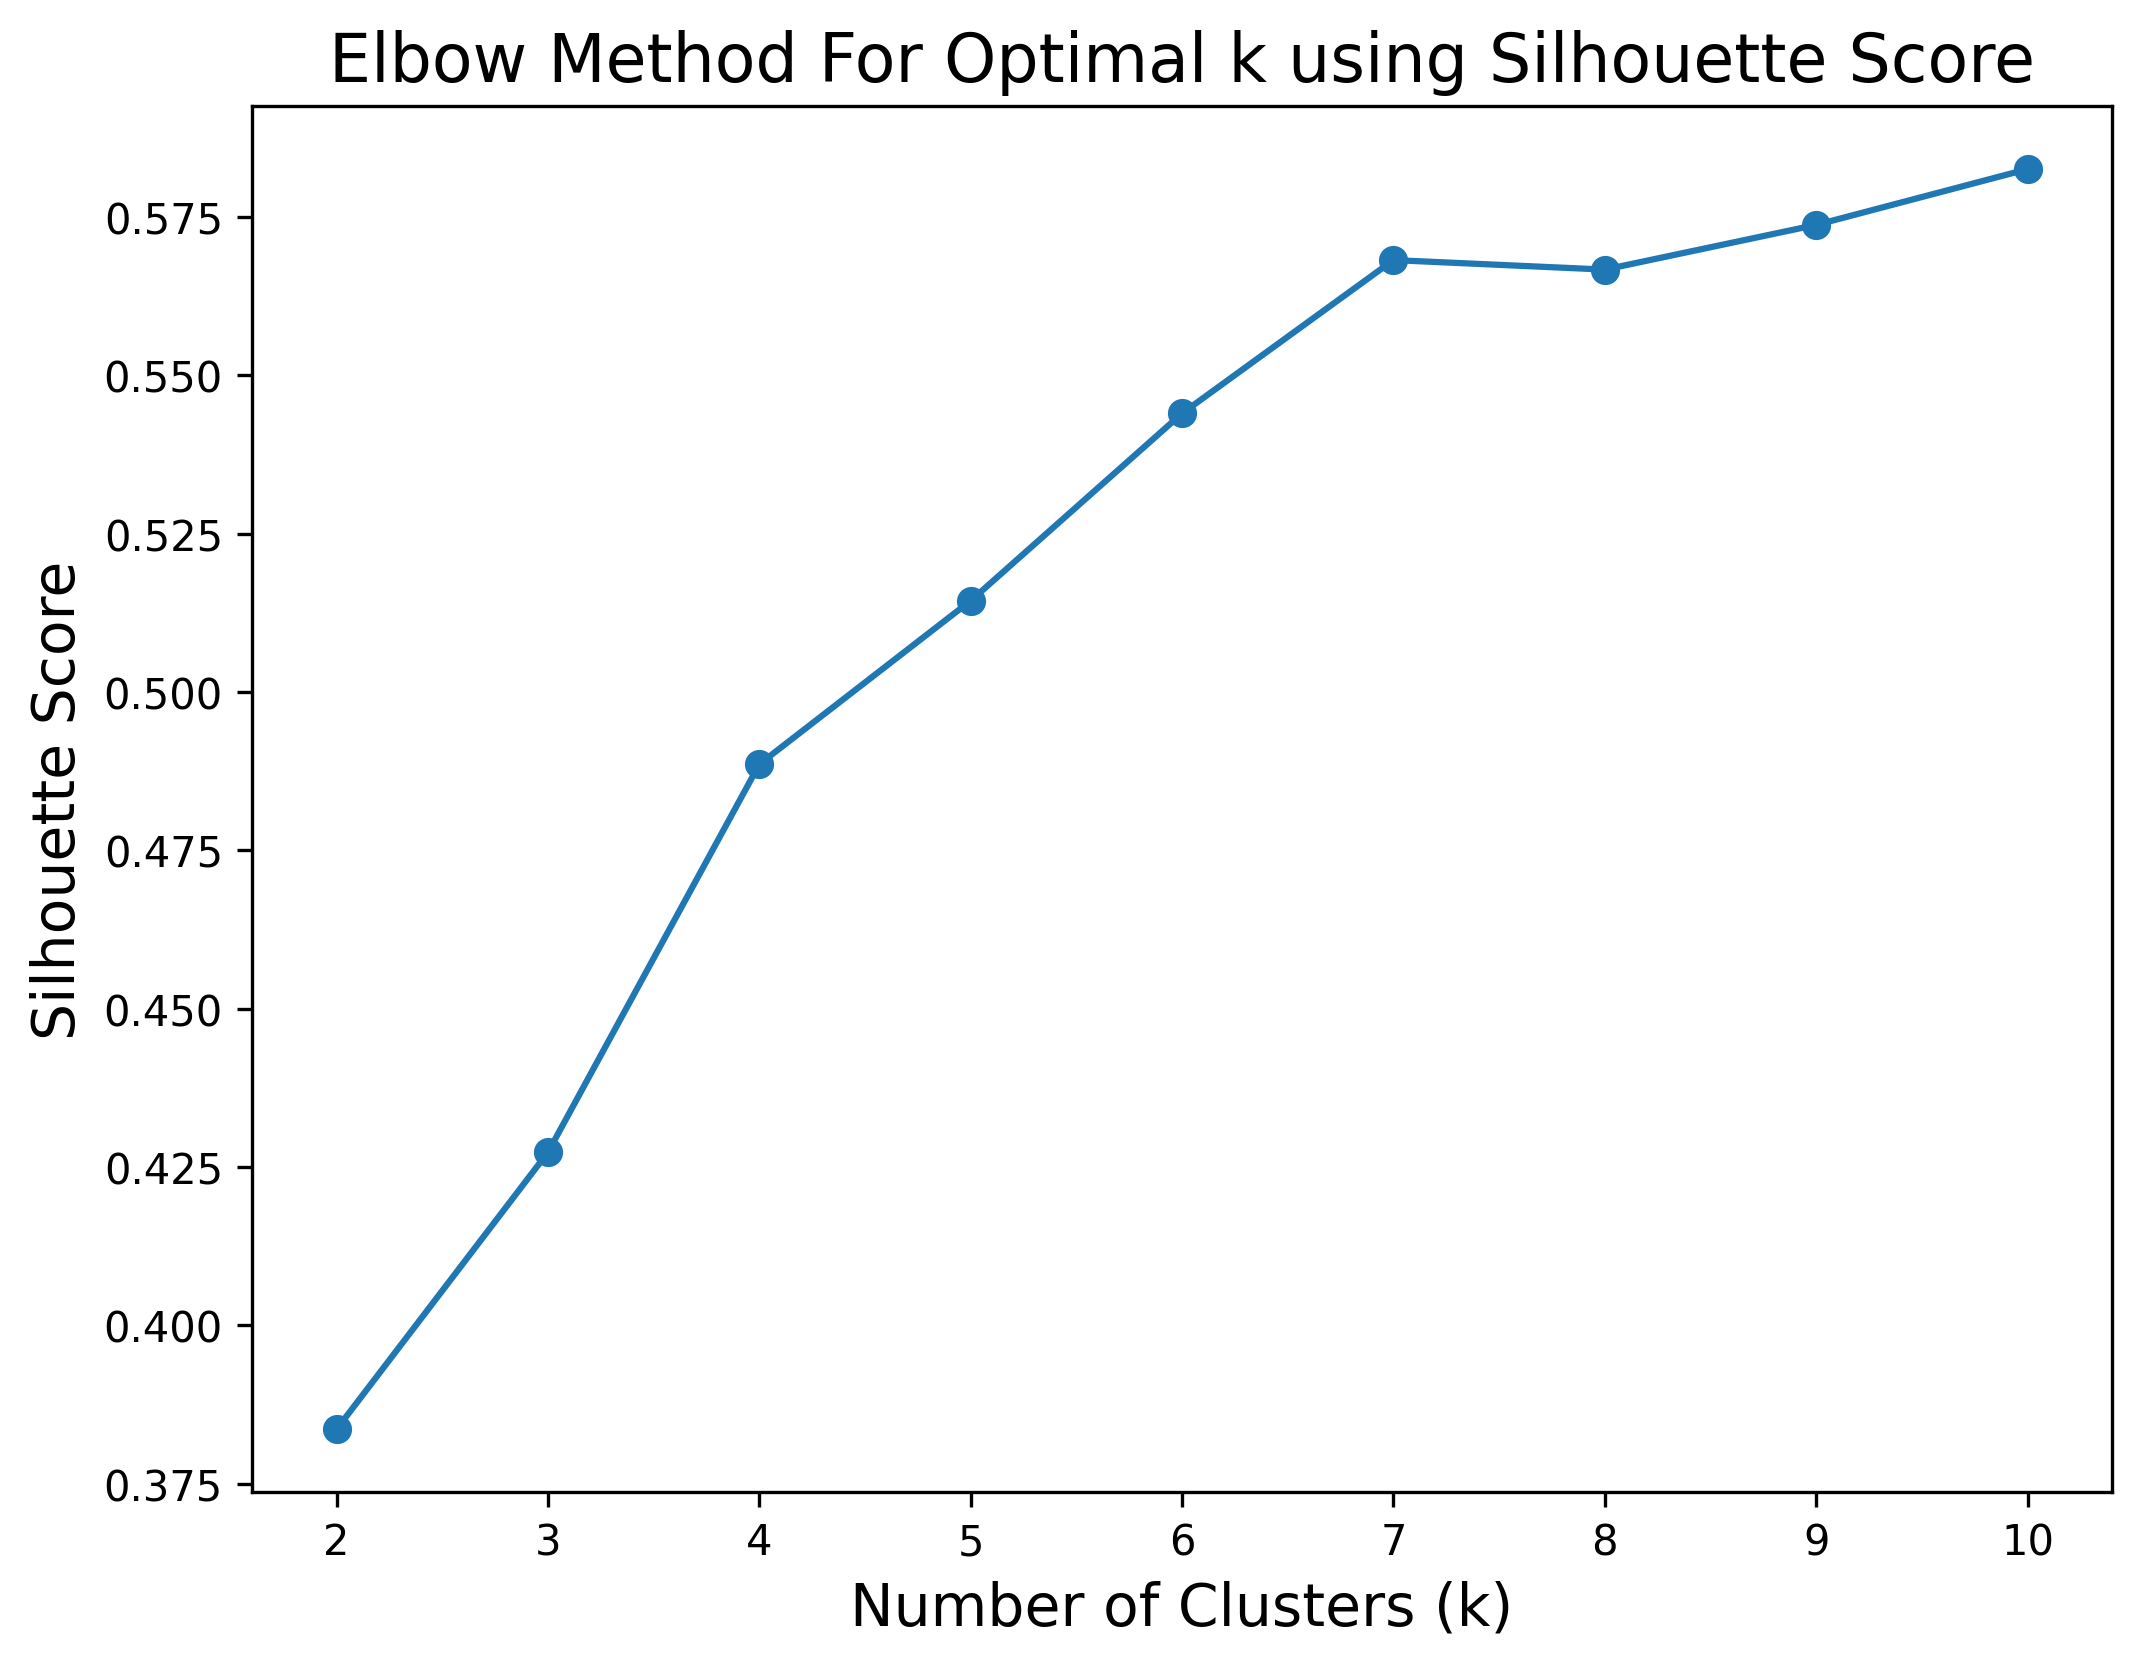

In [5]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_df)
    score = silhouette_score(normalized_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6), dpi=300)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Elbow Method For Optimal k using Silhouette Score', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.show()

In [6]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(normalized_df)

df = df.loc[features.index, ['PCD', 'PS', 'CS', 'PG', 'CG']]
df['cluster'] = clusters
normalized_df['cluster'] = clusters

In [ ]:
mapping = {0: 1, 1: 0, 2: 2, 3: 4, 4: 3}
normalized_df['cluster'] = normalized_df['cluster'].map(mapping)

print(normalized_df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['PCD', 'PS', 'CS', 'PG', 'CG']

colors = ['#350b48', '#3c599e', '#3f9c8d', '#96d14e', '#f8e300']

for i, variable in enumerate(variables):
    plt.figure(figsize=(8, 6), dpi=300)
    sns.boxplot(x='cluster', y=variable, data=normalized_df, palette=colors)
    
    plt.title(f'Box Plot of {variable} by Cluster', fontsize=18)
    plt.xlabel('Cluster', fontsize=16)
    plt.ylabel('Value', fontsize=16)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.savefig(f'/home/aibig30/PCI-AS/demo/outputs/boxplot_{variable}.png')
    plt.close()

<Figure size 1920x1440 with 0 Axes>

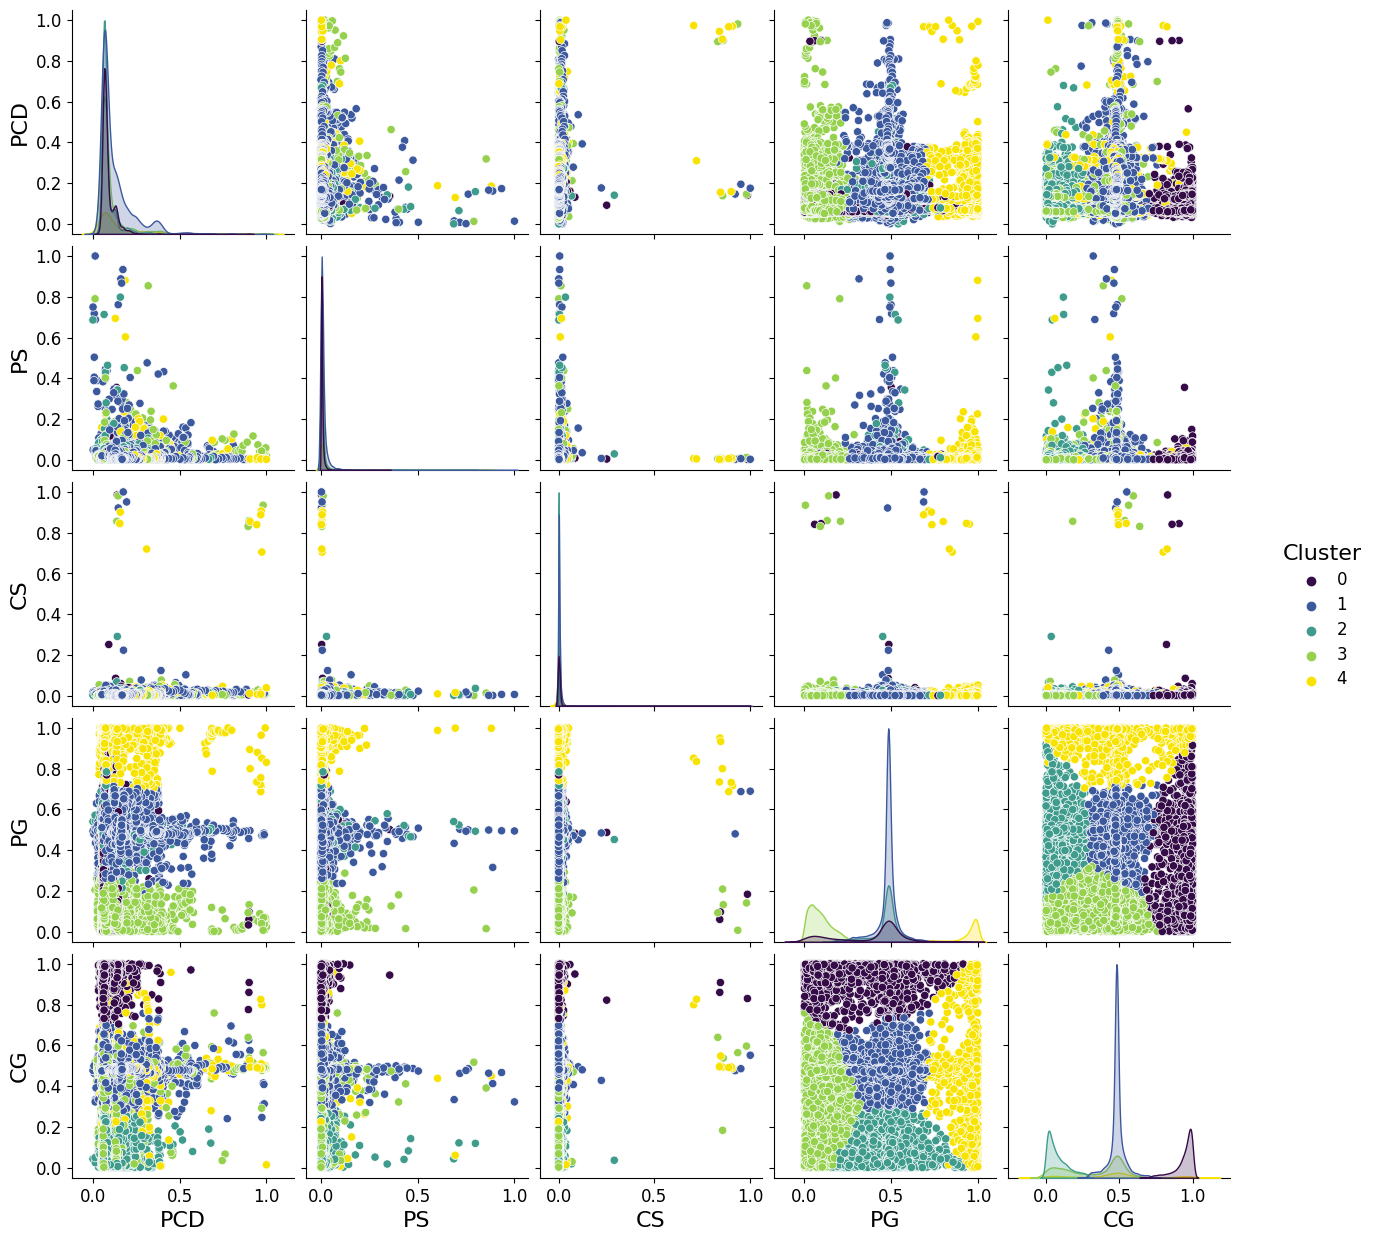

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=300)

colors = ['#350b48', '#3c599e', '#3f9c8d', '#96d14e', '#f8e300']

g = sns.pairplot(
    normalized_df[['PCD', 'PS', 'CS', 'PG', 'CG', 'cluster']], 
    hue='cluster', 
    palette=colors
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)

g._legend.set_bbox_to_anchor((1.05, 0.5))
g._legend.set_title("Cluster", prop={'size': 16})
for text in g._legend.get_texts():
    text.set_fontsize(12)

plt.savefig('/home/aibig30/PCI-AS/demo/outputs/pairplot_clusters.png', bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

combinations = [
    ('PG', 'PCD'),
    ('CG', 'PCD'),
    ('CG', 'PG')
]

palette = ['#350b48', '#3c599e', '#3f9c8d', '#96d14e', '#f8e300']

for x_var, y_var in combinations:
    plt.figure(figsize=(8, 8), dpi=300)
    sns.scatterplot(data=normalized_df, x=x_var, y=y_var, hue='cluster', palette=palette)
    
    plt.xlabel(x_var, fontsize=16)
    plt.ylabel(y_var, fontsize=16)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.legend(title='Cluster', title_fontsize=16, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=12)

    plt.savefig(f'/home/aibig30/PCI-AS/demo/outputs/scatter_{x_var}_vs_{y_var}.png', bbox_inches='tight')
    plt.close()